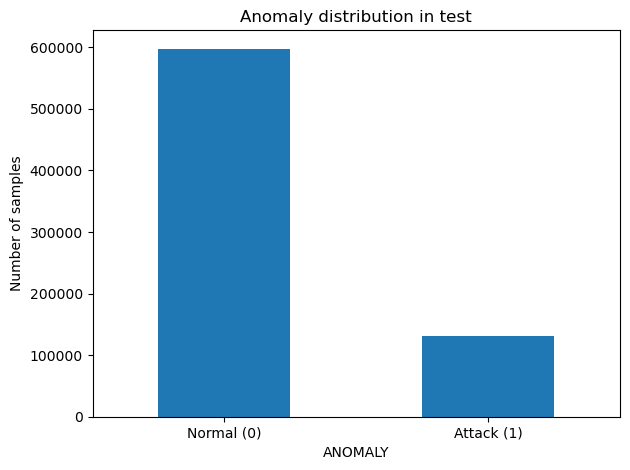

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_test = pd.read_csv("processed/Y_test_processed.csv")
df_test = df_test.sample(frac= 0.8, random_state= 42)

df_test["ANOMALY"].value_counts().plot(kind="bar")
plt.xticks([0,1], ["Normal (0)", "Attack (1)"], rotation=0)
plt.ylabel("Number of samples")
plt.title("Anomaly distribution in test")
plt.tight_layout()
plt.show()

In [2]:
df_train = pd.read_csv("processed/X_train_processed.csv")
df_train.head()
df_train.columns

Index(['PROTOCOL_MAP', 'FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS',
       'LAST_SWITCHED', 'PROTOCOL', 'TCP_FLAGS', 'TCP_WIN_MAX_IN',
       'TCP_WIN_MAX_OUT', 'TCP_WIN_MIN_IN', 'TCP_WIN_MIN_OUT',
       'TCP_WIN_MSS_IN', 'TCP_WIN_SCALE_IN', 'TCP_WIN_SCALE_OUT', 'SRC_TOS',
       'DST_TOS', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS'],
      dtype='object')

In [5]:
isoev = pd.read_csv("../evaluation/eval_isoForest/iso_forest_eval_summary.csv")
isoev


,contamination,elapsed_sec,accuracy,precision_0,recall_0,f1_0,precision_1,recall_1,f1_1,precision_macro,recall_macro,f1_macro
0,0.01,10.706240,0.811101,0.817702,0.990138,0.895696,0.002842,0.000127,0.000244,0.410272,0.495133,0.447970
1,0.02,11.439775,0.802963,0.816345,0.979918,0.890684,0.015359,0.001419,0.002598,0.415852,0.490669,0.446641
2,0.03,11.052849,0.794926,0.814928,0.969924,0.885696,0.016245,0.002250,0.003952,0.415586,0.486087,0.444824
3,0.04,10.743945,0.786954,0.813453,0.960095,0.880712,0.014644,0.002686,0.004540,0.414049,0.481391,0.442626
4,0.05,10.864081,0.778846,0.811962,0.950036,0.875589,0.014886,0.003420,0.005562,0.413424,0.476728,0.440576
5,0.10,10.799506,0.739313,0.804886,0.899910,0.849750,0.025507,0.011867,0.016198,0.415197,0.455889,0.432974
6,0.15,10.722452,0.703338,0.800133,0.850224,0.824418,0.053043,0.038002,0.044280,0.426588,0.444113,0.434349
7,0.20,10.797848,0.662200,0.790428,0.799637,0.795006,0.041866,0.039657,0.040732,0.416147,0.419647,0.417869
8,0.30,10.879099,0.627238,0.819124,0.699378,0.754529,0.180770,0.300472,0.225733,0.499947,0.499925,0.490131
9,0.40,10.845092,0.650243,0.956832,0.600102,0.737599,0.326309,0.877366,0.475697,0.641571,0.738734,0.606648


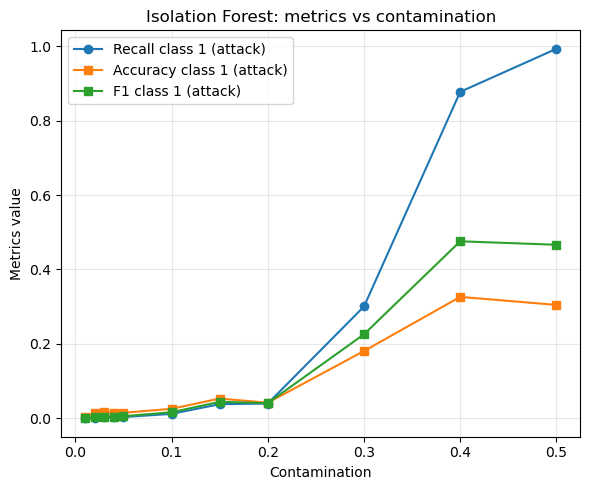

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))

plt.plot(isoev["contamination"], isoev["recall_1"],
         marker="o", label="Recall class 1 (attack)")
plt.plot(isoev["contamination"], isoev["precision_1"],
         marker="s", label="Accuracy class 1 (attack)")
plt.plot(isoev["contamination"], isoev["f1_1"],
        marker="s", label="F1 class 1 (attack)")

plt.xlabel("Contamination")
plt.ylabel("Metrics value")
plt.title("Isolation Forest: metrics vs contamination")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


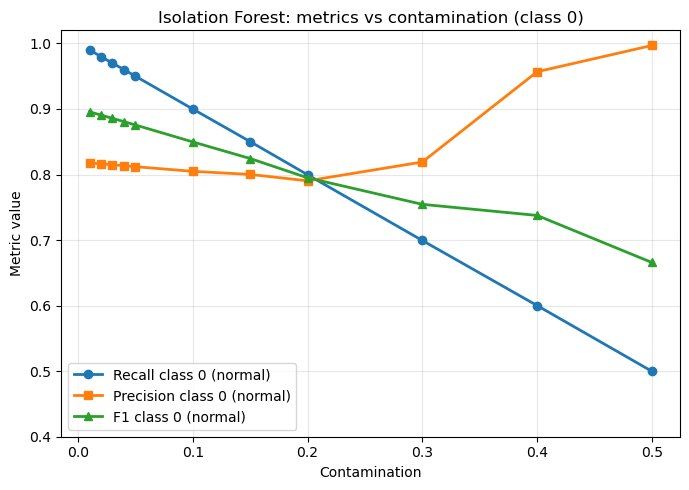

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.plot(isoev["contamination"], isoev["recall_0"],
         color="tab:blue", marker="o", linewidth=2,
         label="Recall class 0 (normal)")
plt.plot(isoev["contamination"], isoev["precision_0"],
         color="tab:orange", marker="s", linewidth=2,
         label="Precision class 0 (normal)")
plt.plot(isoev["contamination"], isoev["f1_0"],
         color="tab:green", marker="^", linewidth=2,
         label="F1 class 0 (normal)")

plt.xlabel("Contamination")
plt.ylabel("Metric value")
plt.title("Isolation Forest: metrics vs contamination (class 0)")
plt.ylim(0.4, 1.02)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)
plt.tight_layout()
plt.show()


In [17]:
confusion = pd.read_csv("../evaluation/eval_isoForest/iso_forest_confusion_cont_0.5.csv")
confusion

,Unnamed: 0,pred_0,pred_1
0,true_0,373364,373636
1,true_1,1154,163760


In [20]:
specificity = 373364 / (373364 + 373636)
specificity

0.49981793842034805